In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('D:/Dixant/CDAC/Machine Learning/29-12-21/perrin-freres-monthly-champagne-.csv')

In [3]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
data.columns=["Month","Sales"]
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
data.drop(106,axis=0,inplace=True)
data.drop(105,axis=0,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [7]:
data['Month']=pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [8]:
data.set_index('Month',inplace=True)

In [9]:
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [10]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

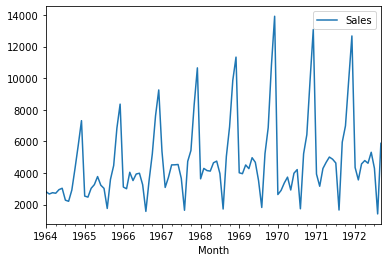

In [11]:
data.plot()

# MOVING AVERAGE (Detrending)

In [12]:
data['SMA_2'] = data.Sales.rolling(2,min_periods=1).mean()
data['SMA_12'] = data.Sales.rolling(12,min_periods=1).mean()
data.head(20)

,Sales,SMA_2,SMA_12
Month,,,
1964-01-01,2815.0,2815.0,2815.000000
1964-02-01,2672.0,2743.5,2743.500000
1964-03-01,2755.0,2713.5,2747.333333
1964-04-01,2721.0,2738.0,2740.750000
1964-05-01,2946.0,2833.5,2781.800000
1964-06-01,3036.0,2991.0,2824.166667
1964-07-01,2282.0,2659.0,2746.714286
1964-08-01,2212.0,2247.0,2679.875000
1964-09-01,2922.0,2567.0,2706.777778


<AxesSubplot:xlabel='Month'>

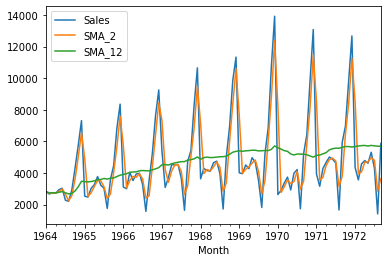

In [13]:
data.plot()

In [14]:
data['CMA']=data.Sales.expanding(min_periods=1).mean()
data.head(15)

,Sales,SMA_2,SMA_12,CMA
Month,,,,
1964-01-01,2815.0,2815.0,2815.000000,2815.000000
1964-02-01,2672.0,2743.5,2743.500000,2743.500000
1964-03-01,2755.0,2713.5,2747.333333,2747.333333
1964-04-01,2721.0,2738.0,2740.750000,2740.750000
1964-05-01,2946.0,2833.5,2781.800000,2781.800000
1964-06-01,3036.0,2991.0,2824.166667,2824.166667
1964-07-01,2282.0,2659.0,2746.714286,2746.714286
1964-08-01,2212.0,2247.0,2679.875000,2679.875000
1964-09-01,2922.0,2567.0,2706.777778,2706.777778


# EMA

In [15]:
# EMA Sales
#Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data (0,1)
# Let's smoothing factor - 0.1
data['EMA_0.1'] = data.Sales.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
data['EMA_0.3'] = data.Sales.ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Month'>

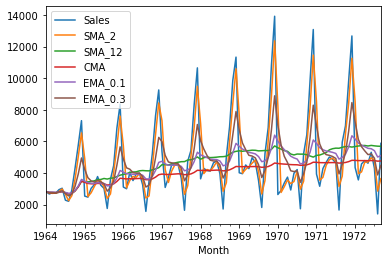

In [16]:
data.plot()

# Check Stationory

In [17]:
rolmean = data.Sales.rolling(window=12).mean()
rolstd = data.Sales.rolling(window=12).std()

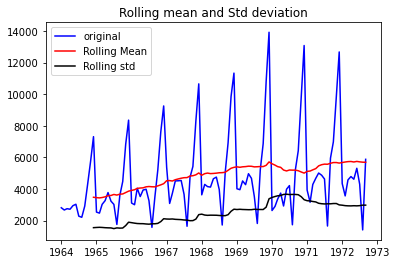

In [18]:
orig = plt.plot(data.Sales,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

In [19]:
## TEsting for Stationarity using Dickey-fuller test
from statsmodels.tsa.stattools import adfuller

In [20]:
test_result=adfuller(data['Sales'])
test_result

(-1.8335930563276184,
 0.36391577166024713,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [21]:
def adfuller_test(sales):
    result=adfuller(sales)
    #print(result)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [22]:
adfuller_test(data['Sales'])

ADF Test Statistic : -1.8335930563276184
p-value : 0.36391577166024713
Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, indicating it is non-stationary 


In [23]:
test_result=adfuller(data['Sales'])
test_result  # 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\

(-1.8335930563276184,
 0.36391577166024713,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

# Coverting non-stationary into stationary (detrending)

In [24]:
df_detrend =  (data['Sales'] - data['Sales'].rolling(window=12).mean())/data['Sales'].rolling(window=12).std()

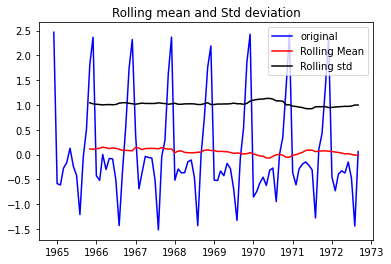

In [25]:
rolmean = df_detrend.rolling(window=12).mean()
rolstd = df_detrend.rolling(window=12).std()
orig = plt.plot(df_detrend,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

# Diffrencing

In [26]:
data['Seasonal_Difference']=data['Sales']-data['Sales'].shift(12)

In [27]:
data.head()

,Sales,SMA_2,SMA_12,CMA,EMA_0.1,EMA_0.3,Seasonal_Difference
Month,,,,,,,
1964-01-01,2815.0,2815.0,2815.000000,2815.000000,2815.0000,2815.0000,NaN
1964-02-01,2672.0,2743.5,2743.500000,2743.500000,2800.7000,2772.1000,NaN
1964-03-01,2755.0,2713.5,2747.333333,2747.333333,2796.1300,2766.9700,NaN
1964-04-01,2721.0,2738.0,2740.750000,2740.750000,2788.6170,2753.1790,NaN
1964-05-01,2946.0,2833.5,2781.800000,2781.800000,2804.3553,2811.0253,NaN


In [29]:
adfuller_test(data['Seasonal_Difference'].dropna())

ADF Test Statistic : -7.626619157213162
p-value : 2.060579696813685e-11
Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


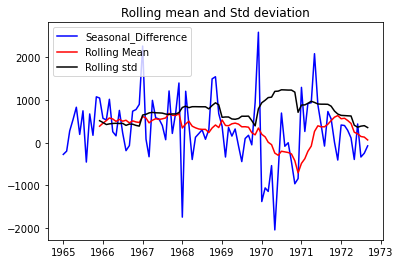

In [32]:
# Rolling Statistics
rolmean = data['Seasonal_Difference'].rolling(window=12).mean()
rolstd = data['Seasonal_Difference'].rolling(window=12).std()
#orig = plt.plot(df.Sales,color='yellow',label='original')
Seasonal_Difference = plt.plot(data['Seasonal_Difference'],color='blue',label='Seasonal_Difference')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

# Forecasting on stationary data

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

<function matplotlib.pyplot.show(close=None, block=None)>

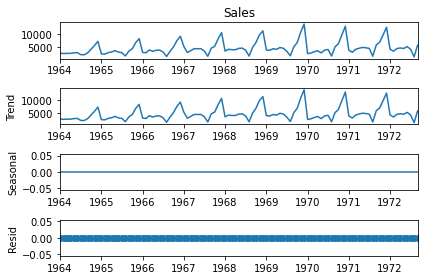

In [35]:
# Decompose the data frame to get the trend, seasonality and noise
decompose_result = seasonal_decompose(data.Sales,model='additive',period=1)
decompose_result.plot()
plt.show

In [37]:
S_df= data['Seasonal_Difference']
n_df = pd.DataFrame(S_df.T)
n_df.dropna(inplace=True)

In [38]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 1965-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Seasonal_Difference  93 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


# Set y_to _train ,y_to_test and the length of predict units

In [39]:
y_to_train=n_df.iloc[:75]
y_to_val=n_df.iloc[75:]
predict_date=len(n_df)-len(n_df.iloc[:75])

In [40]:
predict_date

18

In [57]:
n_df.iloc[:75]

,Seasonal_Difference
Month,
1965-01-01,-274.0
1965-02-01,-197.0
1965-03-01,276.0
1965-04-01,545.0
1965-05-01,830.0
...,...
1970-11-01,-961.0
1970-12-01,-840.0
1971-01-01,1295.0


In [41]:
len(n_df.iloc[75:])

18

# EMA

In [42]:
from statsmodels.tsa.api import SimpleExpSmoothing

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


0.11846511776918588


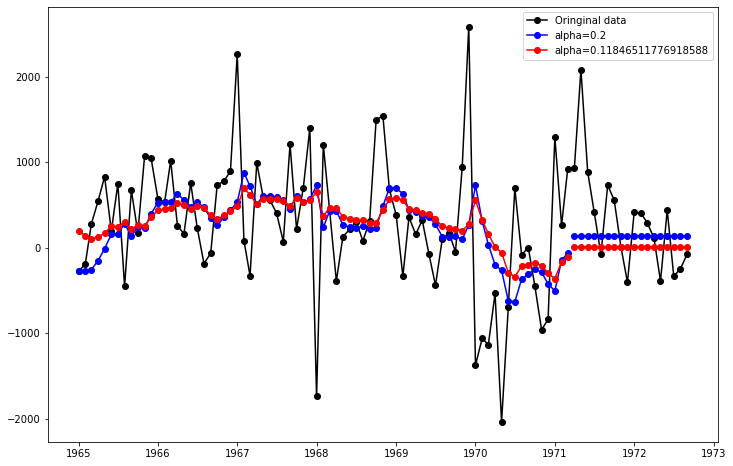

In [45]:
fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(predict_date)
 
fit2 = SimpleExpSmoothing(y_to_train).fit() 
#statsmodels to automatically find an optimized alpha value for us.
fcast2 = fit2.forecast(predict_date)
 
alpha = fit2.params["smoothing_level"]
print(alpha)
 
plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')
 
plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='alpha=0.2')
 
plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha}')
 
plt.legend()
plt.show()

In [47]:
sse1=fit1.sse
sse1

48770904.168382205

In [48]:
sse2=fit2.sse
sse2

46833822.44580448

# Holt


In [49]:
from statsmodels.tsa.api import Holt

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-52-6e97ede705d5>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(y_to_train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


0.14863174348062722
0.08377319675535357


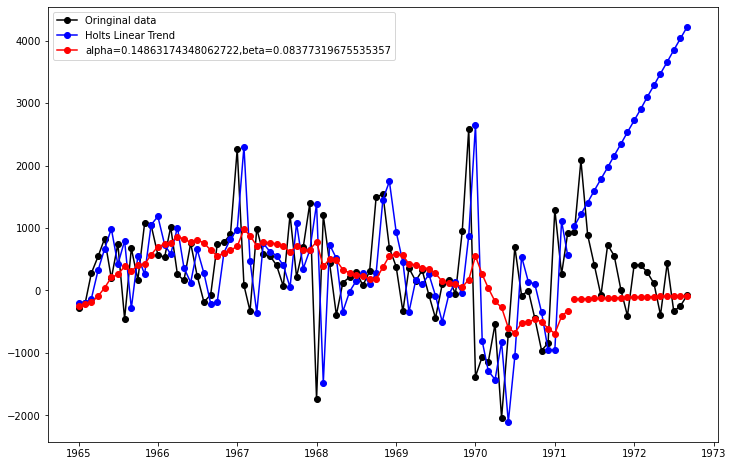

In [52]:
fit1 = Holt(y_to_train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(predict_date)
 
fit2 = Holt(y_to_train).fit()
fcast2 = fit2.forecast(predict_date)


alpha = fit2.params["smoothing_level"]
print(alpha)
beta = fit2.params["smoothing_trend"]
print(beta)            


plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')
 
plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='Holts Linear Trend')
 
plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha},beta={beta}')
 
plt.legend()
plt.show()

In [53]:
sse1=fit1.sse
print(sse1)
sse2=fit2.sse
print(sse2)

76710338.3772673
50204114.63210948


# Holt Winters Seasonal method

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


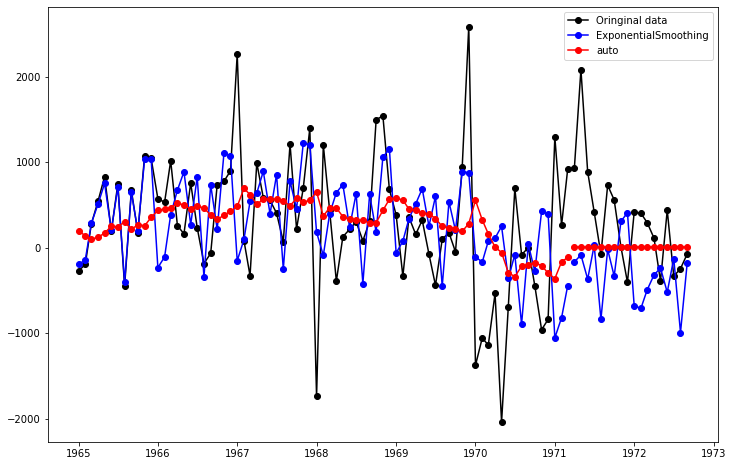

In [55]:
fit1 = ExponentialSmoothing(y_to_train,seasonal_periods = 12, trend='add', seasonal='add').fit()
fcast1 = fit1.forecast(predict_date)
 
fit2 = ExponentialSmoothing(y_to_train).fit()  # use_boxcox=True
fcast2 = fit2.forecast(predict_date)            

plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')
 
plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='ExponentialSmoothing')
 
plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label='auto')
 
plt.legend()
plt.show()

In [56]:
#square sum error
sse1 =fit1.sse
print(sse1)
sse2=fit2.sse
print(sse2)

49216525.09321161
46833822.44580448
